In [95]:
from dotenv import load_dotenv
import os

from azure.core.credentials import AzureKeyCredential
from azure.maps.render import MapsRenderClient
from azure.maps.render import TilesetID
from IPython.display import Image, display

import httpx

load_dotenv()
AZURE_MAPS_KEY = os.environ.get('AZURE_MAPS_KEY')
# print(AZURE_MAPS_KEY)

In [96]:
credential = AzureKeyCredential(os.environ.get("AZURE_MAPS_KEY"))
maps_render_client = MapsRenderClient(credential=credential)

result = maps_render_client.get_map_attribution(
    tileset_id=TilesetID.MICROSOFT_BASE,
    zoom=6,
    bounds=[42.982261, 24.980233, 56.526017, 1.355233],
)
print(result)

{'copyrights': ['<a data-azure-maps-attribution-dynamic="true" data-azure-maps-attribution-tileset="microsoft.core.vector">&copy;2024 OSM</a>', '<a data-azure-maps-attribution-dynamic="true" data-azure-maps-attribution-tileset="microsoft.core.vector">&copy;2024 TomTom</a>']}


In [97]:
result = maps_render_client.get_map_tile(
    tileset_id=TilesetID.MICROSOFT_BASE,
    z=6,
    x=9,
    y=22,
    tile_size="512"
)
print(result)

<generator object HttpResponseImpl.iter_bytes at 0x700829b03e20>


In [98]:
result = maps_render_client.get_map_tileset(tileset_id=TilesetID.MICROSOFT_BASE)

print(result)

{'tileJson': '2.2.0', 'name': 'microsoft.core.vector', 'version': '1.0.0', 'attribution': '<a data-azure-maps-attribution-dynamic="true" data-azure-maps-attribution-tileset="microsoft.core.vector"></a>', 'scheme': 'xyz', 'tiles': ['https://atlas.microsoft.com/map/tile?api-version=2.1&tilesetId=microsoft.core.vector&zoom={z}&x={x}&y={y}&language=ngt'], 'grids': [], 'data': [], 'minzoom': 1, 'maxzoom': 21, 'bounds': [-180, -90, 180, 90]}


In [99]:
result = maps_render_client.get_map_static_image(
    zoom=10,
    bounding_box_private=[13.228, 52.4559, 13.5794, 52.629]
)
print(result)

<generator object HttpResponseImpl.iter_bytes at 0x700829b03e20>


In [100]:
result = maps_render_client.get_copyright_for_world()
print(result)

{'formatVersion': '0.0.1', 'generalCopyrights': ['© 1992 - 2024 TomTom. All rights reserved. This material is proprietary and the subject of copyright protection, database right protection and other intellectual property rights owned by TomTom or its suppliers. The use of this material is subject to the terms of a license agreement. Any unauthorized copying or disclosure of this material will lead to criminal and civil liabilities.', 'Data Source © 2024 TomTom', 'based on'], 'regions': [{'country': {'ISO3': 'ABW', 'label': 'Aruba'}, 'copyrights': ['You agree to include as soon as practically possible, but no later than the first new release of the Authorized Application following Your receipt of any 3D Landmarks, any copyright notices related to the display of such landmarks on every Authorized Application and in the “about box” of the Authorized Application.  Notwithstanding the aforementioned, TomTom has the right to decide, at its sole discretion, to remove specific 3D Landmarks in 

In [ ]:
width=600
height=400
zoom=13

fieldop_lat=30.42
fieldop_lon=-97.92
aid1_lat=30.415
aid1_lon=-97.922
tileset_id='microsoft.base.darkgrey'
life_url="https://opeongo.net/icons/lifebuoy.png"

pin_instances = [
    f"default|co008000|lcFFFFFF||'OP'{fieldop_lon} {fieldop_lat}",
    f"default|coFFFF00|lc000000||'AID'{aid1_lon} {aid1_lat}"
]

The response content is a PNG file, size: 86550. Type: image/png


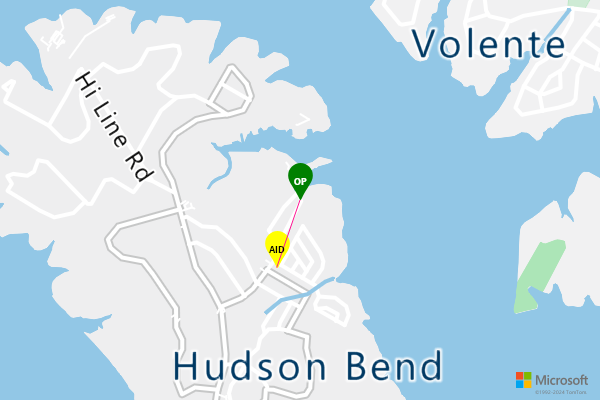

In [213]:
url = "https://atlas.microsoft.com/map/static/png"
params = {
  'subscription-key': AZURE_MAPS_KEY,
  'api-version': '1.0',
  'layer': 'basic',
  'style': 'main',
  'zoom': zoom,
  'center': f'{fieldop_lon},{fieldop_lat}',
  'width': width,
  'height': height,
  'pins': pin_instances,
  'path': f'lcFF1493||{fieldop_lon} {fieldop_lat}|{aid1_lon} {aid1_lat}'
}
response = httpx.get(url, params=params)
response_content = response.content
if response.content.startswith(b'\x89PNG'):
  print(f"The response content is a PNG file, size: {response.headers['content-length']}. Type: {response.headers['content-type']}")
  # Display the image
  display(Image(data=response.content))
else:
  print("The response content is not a PNG file.")
  print(response_content)


In [ ]:


def get_map_image(center_lat, center_lon, marker_lat, marker_lon, zoom=12, width=800, height=600):
  url = "https://atlas.microsoft.com/map/static/png"
  params = {
    'subscription-key': AZURE_MAPS_KEY,
    'api-version': '1.0',
    'layer': 'basic',
    'style': 'main',
    'zoom': zoom,
    'center': f'{center_lon},{center_lat}',
    'width': width,
    'height': height,
    'pins': f"default||{center_lon} {center_lat}"
    # |default||'aid request'{marker_lon} {marker_lat}"
    # 'pins': f'AidRequestX.loc||{marker_lat},{marker_lon}'
  }
  response = httpx.get(url, params=params)
  return response

In [ ]:
credential = AzureKeyCredential(os.environ.get("AZURE_MAPS_KEY"))
maps_client = MapsRenderClient(credential=credential)

In [ ]:
pin_styles = [
    "pin-blue",  # Default blue pin
    "pin-red",   # Red pin
    "pin-green"  # Green pin
]
center=[-97.95,30.42]
pin_instances = [
    # f"default||{center}",
    f"default||'barf'-97.945 30.415",
    f"default||'cat'-97.935 30.425"
]
width=800
height=600
zoom=12

response = maps_client.get_map_static_image(
    center=center,
    zoom=zoom,
    width=width,
    height=height,
    # pins=pin_instances
)
next(result)


In [ ]:
# result = maps_render_client.get_map_static_image(
#     zoom=10,
#     bounding_box_private=[13.228, 52.4559, 13.5794, 52.629]
# )
width=800
height=600
zoom=12

response = maps_client.get_map_static_image(
    center=center,
    zoom=zoom,
    width=width,
    height=height,
    # pins=pin_instances
)
print("Get map tile result to png file as 'map_static_image.png'")
# Save result to file as png
with open('map_static_image.png', 'wb') as file:
    file.write(next(response))
    file.close()

In [ ]:
print(len(result))

In [ ]:

png_data = response
display(Image(data=png_data))

In [ ]:

print(response.read())


In [ ]:
print(str(response))

In [ ]:
# Read the content of the response
response_content = response.content

# Check if the response content is a PNG file
if response_content.startswith(b'\x89PNG'):
  print("The response content is a PNG file.")
  # Display the image
  display(Image(data=response_content))
  content_length = headers['content-length']
  print(content_length)
else:
  print("The response content is not a PNG file.")
  # Process the response content as needed
  print(response_content)

In [ ]:

for item in response:
  print(item)
# if response.content.startswith(b'\x89PNG'):
#   print("The response content is a PNG file.")
#   # Display the image
#   display(Image(data=response.content))
#   content_length = headers['content-length']
#   print(content_length)
# else:
#   print("The response content is not a PNG file.")

In [ ]:

center_lat = 30.42
center_lon = -97.93
marker_lat = 30.4235
marker_lon = -97.9326

response = get_map_image(center_lat, center_lon, marker_lat, marker_lon)
headers = response.headers
print(response)

print(headers)

In [ ]:
if response.content.startswith(b'\x89PNG'):
  print("The response content is a PNG file.")
  # Display the image
  display(Image(data=response.content))
  content_length = headers['content-length']
  print(content_length)
else:
  print("The response content is not a PNG file.")

In [ ]:
# Save the image to a file
with open('map_image.png', 'wb') as f:
  f.write(response.content)

In [ ]:
def get_search_fuzzy(query):
  url = "https://atlas.microsoft.com/search/fuzzy/json"
  params = {
    'subscription-key': AZURE_MAPS_KEY,
    'api-version': '1.0',
    'query': query
  }
  response = httpx.get(url, params=params)
  return response.json()

query = 'Golden Gate Bridge, San Francisco, CA'

response_json = get_search_fuzzy(query)

print(response_json)
# print(response_json['results'])
for item in response_json['results']:
  print('Result_Type', item['type'])
  if 'poi' in item:
      print('Name', item['poi']['name'])
  print('Address:', item['address']['freeformAddress'])
  print('Lat Long:', item['position'])
